In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<Axes: xlabel='type', ylabel='count'>

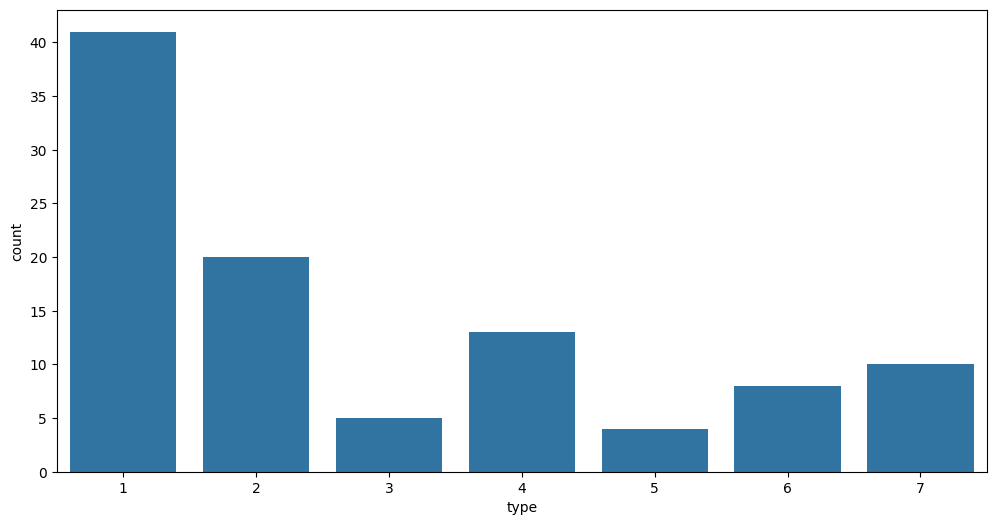

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type')

In [6]:
df.type.value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

<Axes: >

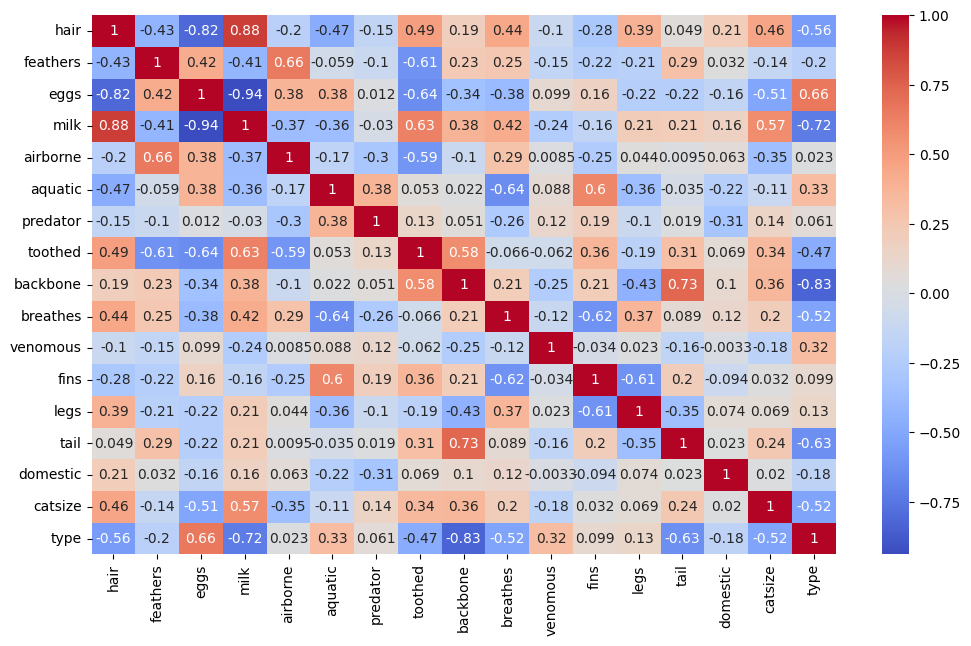

In [7]:
plt.figure(figsize=(12, 7))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [8]:
df.drop(columns=['animal name'], inplace=True)

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
param_grid = {'n_neighbors': list(range(1, 21))}

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


In [16]:
print(f'Best Score: {grid.best_score_}')
print(f'Best Parameter: {grid.best_params_}')

Best Score: 0.9625
Best Parameter: {'n_neighbors': 1}


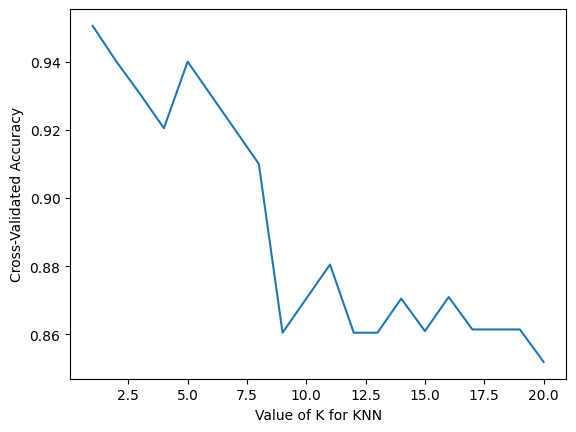

In [17]:
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())

# Plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [18]:
model = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
model.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



<Axes: xlabel='Animal_Type', ylabel='count'>

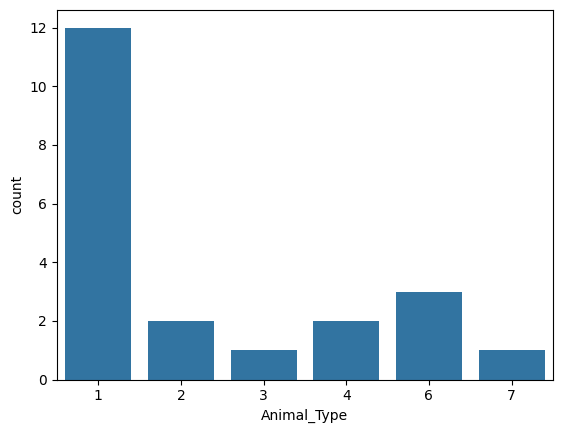

In [21]:
y_test_named = y_test.copy()
y_test_named.name = "Animal_Type" 
sns.countplot(x=y_test_named)

In [22]:
model = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)
model.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [23]:
model = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
model.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



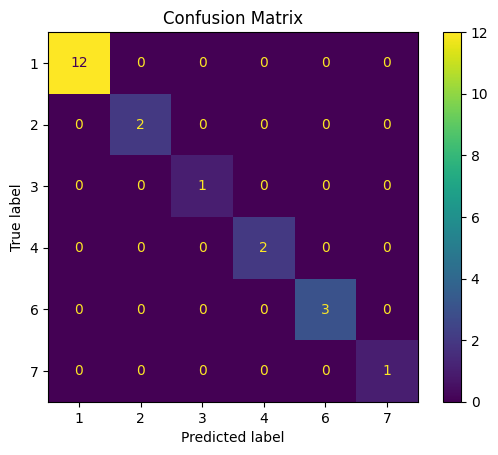

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

Visualizing the Decision Boundaries

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [26]:
# Training a new model on reduced dataset
knn_vis = KNeighborsClassifier(n_neighbors=2) # using k = 2 to reduce noise
knn_vis.fit(X_pca, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

In [28]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [29]:
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

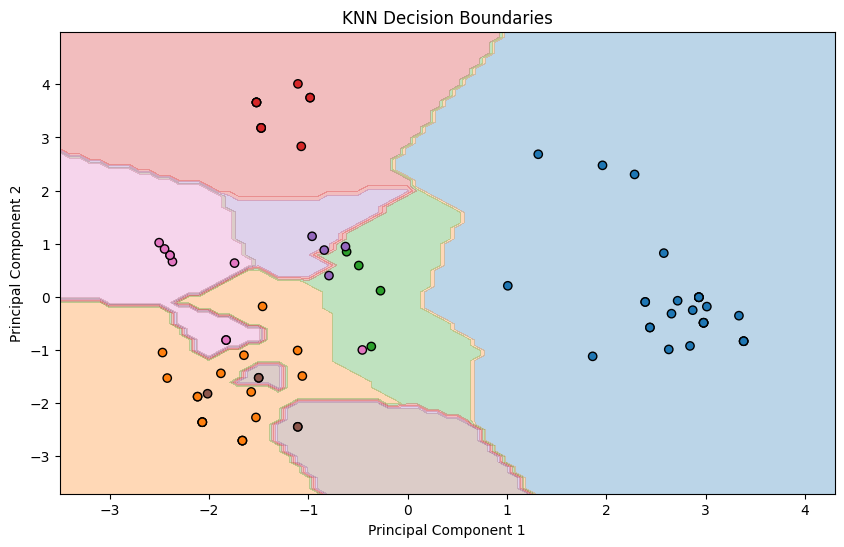

In [30]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(sns.color_palette("tab10", n_colors=7)))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(sns.color_palette("tab10", n_colors=7)))
plt.title("KNN Decision Boundaries")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

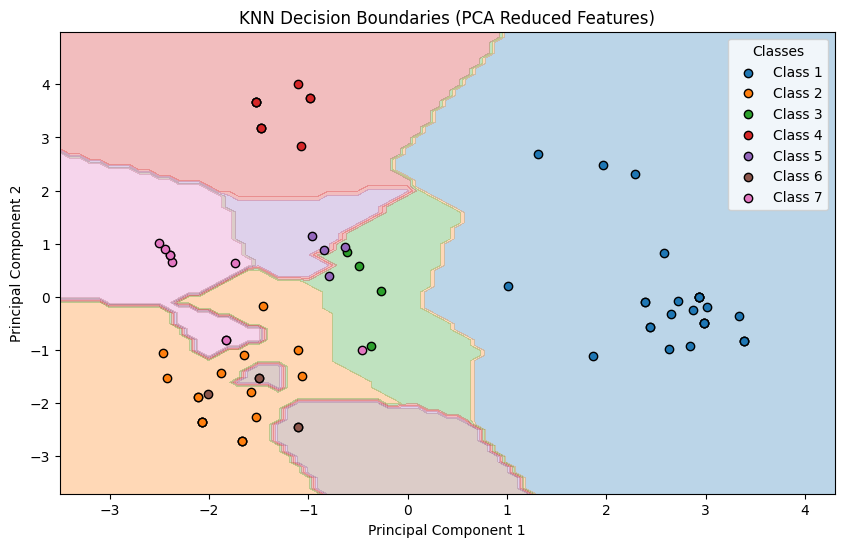

In [31]:
# Define custom colormap and unique labels
unique_labels = np.unique(y_train)
cmap = ListedColormap(sns.color_palette("tab10", n_colors=len(unique_labels)))

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

# Plot each class with a label for the legend
for i, label in enumerate(unique_labels):
    plt.scatter(
        X_pca[y_train == label, 0],
        X_pca[y_train == label, 1],
        label=f'Class {label}',
        cmap=cmap,
        edgecolors='k'
    )

# Titles and labels
plt.title("KNN Decision Boundaries (PCA Reduced Features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Show legend
plt.legend(title="Classes")
plt.show()

### Interview Questions

##### 1. What are the key hyperparameters in KNN?

- Key hyperparameters in KNN are:

    - n_neighbors (Number of neighbors to use (denoted as k))

    - weights ('Uniform'(default) - all neighbors have equal weights, 'distance' - closer neighbors have more influence)

    - metric (Determines how distances are calculated between data points)

    - Algorithm (Determines the algorithm used to compute the nearest neighbors. ('auto', 'ball_tree', 'kd_tree', 'brute'))

    - p (Power parameter for the Minkowski metric, p = 1 (Manhattan distance), p = 2 (Euclidean distance))

##### 2. What distance metrics can be used in KNN?

- Common Distance Metrics are:

    - Euclidean Distance
    - Manhattan Distance
    - Minkowski Distance
    - Chebyshev Distance
    - Cosine Similarity
    - Hamming Distance